### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 6
### Due: Saturday, Mar 14th at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

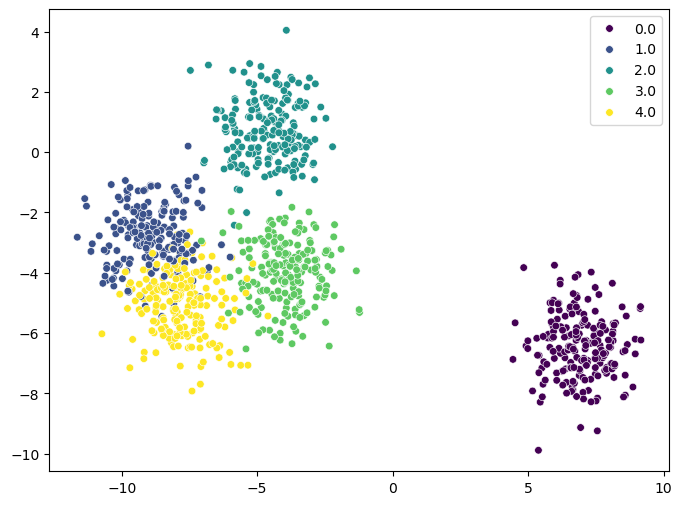

(array([[-8.46474567, -3.45517123],
        [-9.93233853, -2.31955228],
        [-9.30833095, -1.9725388 ],
        ...,
        [-3.42236789,  1.69166315],
        [-3.31992823, -6.1090681 ],
        [-3.62495834,  0.11710104]]),
 array([1., 1., 1., 2., 1., 4., 4., 1., 3., 2., 3., 0., 4., 3., 1., 0., 4.,
        4., 2., 2., 1., 4., 4., 1., 0., 1., 4., 0., 0., 3., 1., 3., 2., 3.,
        2., 0., 0., 0., 3., 1., 1., 2., 2., 1., 2., 2., 2., 4., 2., 4., 3.,
        0., 2., 0., 0., 0., 0., 1., 4., 1., 0., 2., 2., 0., 0., 0., 4., 0.,
        4., 0., 3., 3., 1., 4., 1., 2., 0., 1., 4., 3., 0., 4., 3., 1., 2.,
        3., 0., 3., 0., 0., 3., 0., 4., 2., 4., 0., 3., 2., 4., 4., 1., 0.,
        0., 2., 0., 3., 4., 3., 0., 1., 1., 3., 3., 3., 1., 3., 3., 4., 3.,
        1., 3., 3., 2., 1., 3., 0., 1., 4., 4., 4., 3., 3., 2., 1., 1., 3.,
        1., 0., 4., 0., 2., 4., 3., 4., 1., 2., 3., 1., 3., 4., 4., 2., 4.,
        4., 1., 4., 4., 4., 1., 2., 1., 3., 0., 2., 1., 0., 3., 3., 0., 4.,
        1

In [60]:
data = np.load('hw_data/hw6_data_1.npy')

X = data[:, :-1]
y = data[:, -1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=30)
plt.show()
X,y

Best bandwidth: 0.472


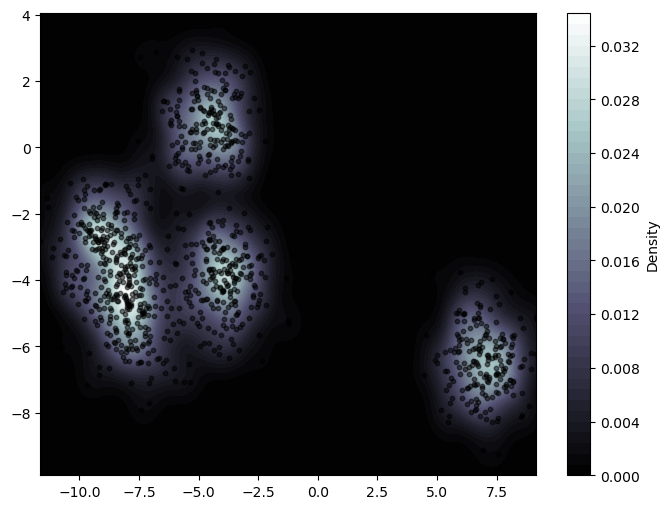

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

bandwidths = np.linspace(0.1, 1.0, 30)

grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidths}, cv=5)
grid.fit(X)

best_bandwidth = grid.best_params_['bandwidth']
print(f"Best bandwidth: {best_bandwidth:.3f}")

kde = KernelDensity(bandwidth=best_bandwidth)
kde.fit(X)

x, y = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100),
                   np.linspace(X[:,1].min(), X[:,1].max(), 100))
grid_points = np.vstack([x.ravel(), y.ravel()]).T
log_density = kde.score_samples(grid_points)
density = np.exp(log_density).reshape(100, 100)

plt.figure(figsize=(8, 6))
plt.contourf(x, y, density, levels=50, cmap='bone')
plt.colorbar(label='Density')
plt.scatter(X[:, 0], X[:, 1], c='k', s=10, alpha=0.5)
plt.show()

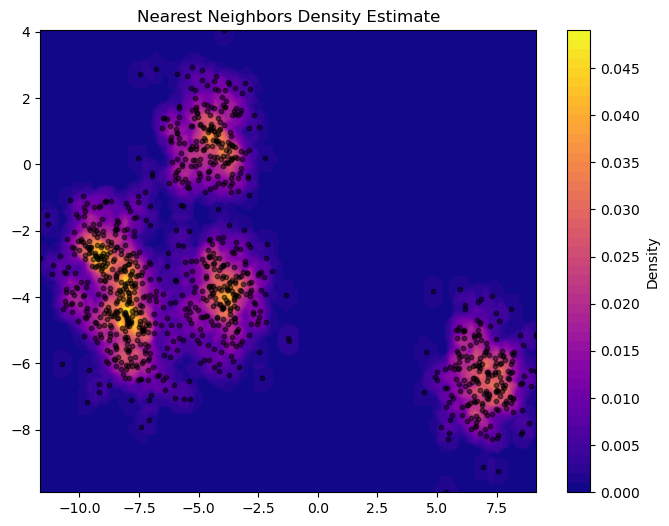

In [54]:
kde_nn = KernelDensity(bandwidth=best_bandwidth, kernel='tophat')
kde_nn.fit(X)

log_density_nn = kde_nn.score_samples(grid_points)
density_nn = np.exp(log_density_nn).reshape(100, 100)

plt.figure(figsize=(8, 6))
plt.contourf(x, y, density_nn, levels=50, cmap='plasma')
plt.colorbar(label='Density')
plt.scatter(X[:, 0], X[:, 1], c='k', s=10, alpha=0.5)
plt.title('Nearest Neighbors Density Estimate')
plt.show()


D:\Softwares\miniconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Softwares\miniconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Softwares\miniconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Softwares\miniconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

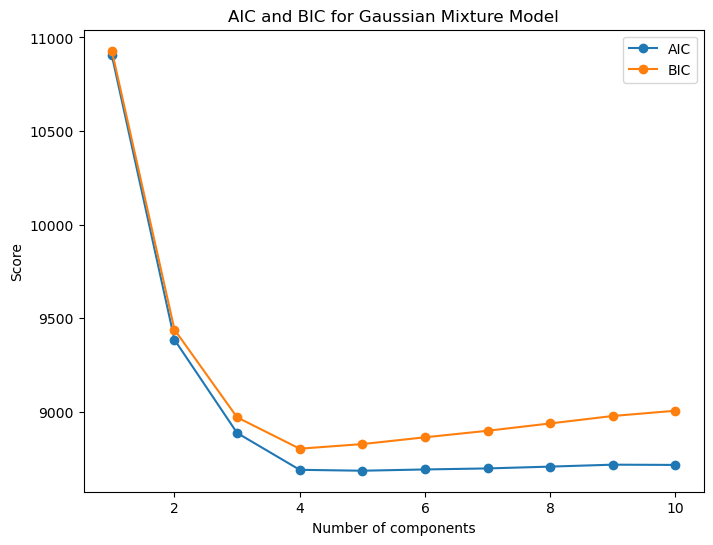

In [61]:
n_components = np.arange(1, 11)
aic = []
bic = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    aic.append(gmm.aic(X))
    bic.append(gmm.bic(X))

plt.figure(figsize=(8, 6))
plt.plot(n_components, aic, label='AIC', marker='o')
plt.plot(n_components, bic, label='BIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.title('AIC and BIC for Gaussian Mixture Model')
plt.show()

In [62]:
optimal_n = n_components[np.argmin(bic)]
print('Optimal number of components according to BIC',optimal_n)

Optimal number of components according to BIC 4


In [63]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)
means = gmm.means_
covariances = gmm.covariances_

#sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=30)

D:\Softwares\miniconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<span style="color:red"> NP: here you should be using the optimal number of GMM components you derived above. -1 pt </span>

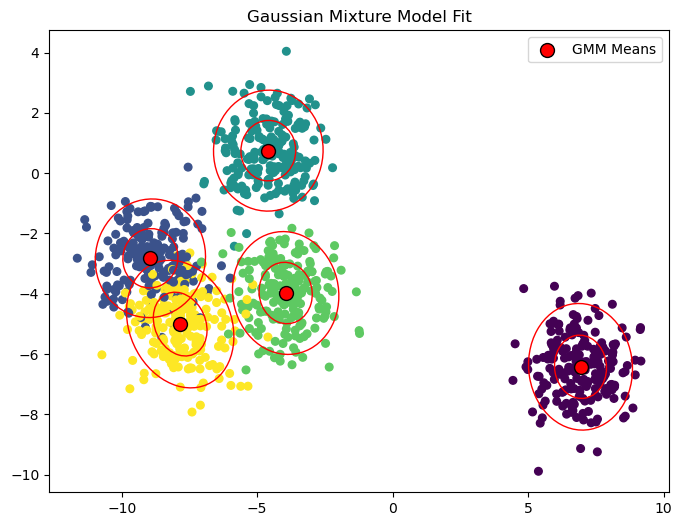

In [64]:
# Kludge to fix the bug with draw_ellipse in astroML
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs))

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)

ax = plt.gca()
for mean, cov in zip(means, covariances):
    draw_ellipse(mean, cov, scales=[1, 2], ax=ax, edgecolor='red', facecolor='none')

plt.scatter(means[:, 0], means[:, 1], c='red', s=100, label='GMM Means', edgecolors='k')
plt.title('Gaussian Mixture Model Fit')
plt.legend()
plt.show()

## My Optimal number of components is 4, but i think 5 is more right here.... I think

<span style="color:red"> NP: why? do you have objective, data-based evidence to back that up? On the otherhand, the data in and of itself, through cross-validation prefers 4 components. Remember that in "real life" you wil usually not have the advantage of knowing what the "true" value of these components is, which is why we are learning these data-driven methods to calculate the optimal number of components. </span>

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

### Solution

D:\Softwares\miniconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


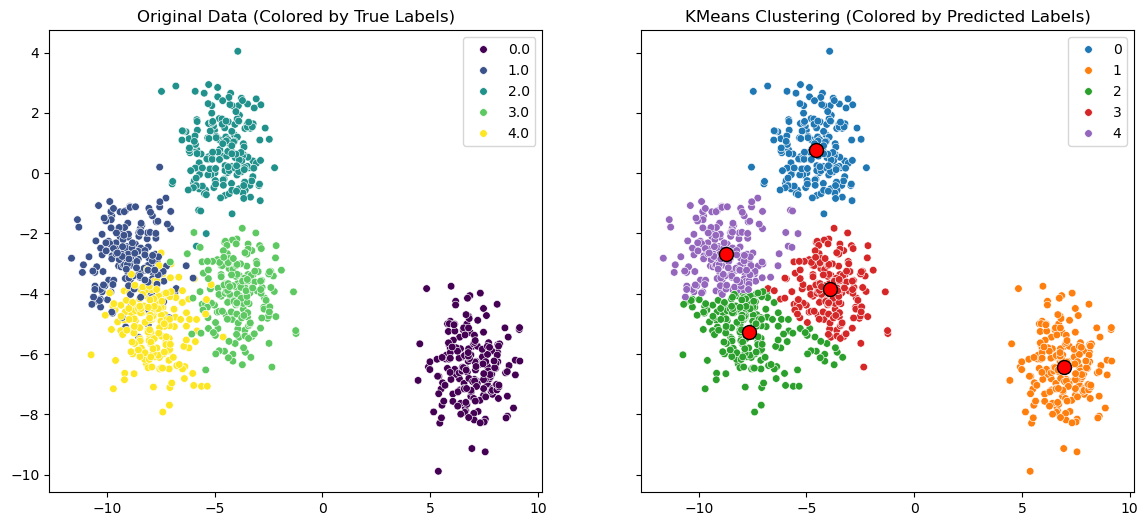

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

predicted_labels = kmeans.predict(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=30, ax=ax[0])
ax[0].set_title('Original Data (Colored by True Labels)')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predicted_labels, palette='tab10', s=30, ax=ax[1])
ax[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, edgecolors='k', label='Cluster Centers')
ax[1].set_title('KMeans Clustering (Colored by Predicted Labels)')


plt.show()